<a href="https://colab.research.google.com/github/sheamusfitz/DSPS_jFitzgerald/blob/master/HW9/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
import shutil
import sklearn as sk
from sklearn.model_selection import train_test_split 
import __future__
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [248]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


## Kaggle Validation

In [249]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.csv  test.zip
mysolution.csv                           random_submission.zip  training.csv
mysubmission.csv                         test.csv               training.zip


In [250]:
cd /content/drive/'My Drive'/dsps/HW9/kaggleHiggsBoson

/content/drive/My Drive/dsps/HW9/kaggleHiggsBoson


In [0]:
# mkdir HW9

In [0]:
# mv kaggle.json HW9/

In [0]:
# cd HW9

In [0]:
# !mkdir ~/.kaggle

In [0]:
# mv kaggle.json ~/.kaggle/

In [0]:
# cd /content/drive/My\ Drive/dsps/HW9

In [0]:
# ls kaggleHiggsBoson/ -a

In [0]:
# ls ~/.kaggle

In [0]:
# !chmod 600 ~/.kaggle/kaggle.json

In [0]:
#validating username and key for kaggle
# envs = json.load(open("/root/.kaggle/kaggle.json", "r"))
# os.environ["KAGGLE_USERNAME"] = envs['username']
# os.environ["KAGGLE_KEY"] = envs['key']


In [0]:
# !kaggle datasets list

## Data Indegestion

In [0]:
# ls

In [0]:
# pwd

In [0]:
# !mkdir '/content/drive/My Drive/dsps/HW9'/kaggleHiggsBoson

In [0]:
# pwd

In [0]:
# cd kaggleHiggsBoson/

In [0]:
# ls

In [0]:
# !kaggle competitions download -c higgs-boson

In [0]:
# ls

In [0]:
# !unzip training.zip

In [0]:
# !unzip test.zip

In [0]:
# ls -lh

## Reading and Manipulating Data

In [0]:
higgsdata = pd.read_csv("training.csv")

weights = higgsdata['Weight'].to_numpy()
labels = higgsdata['Label'].to_numpy()
higgsdata.drop(labels = ['Weight', 'Label'], axis = 1, inplace = True)

In [273]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [274]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [275]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [276]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [0]:
labels_train, labels_test, weights_train, weights_test, higgsdata_train,\
    higgsdata_test = sk.model_selection.train_test_split(labels, weights,
        higgsdata, test_size = 0.25, train_size = 0.75, random_state = 100016)

In [278]:
labels_train

array(['b', 'b', 's', ..., 's', 'b', 'b'], dtype=object)

In [279]:
labels_test

array(['b', 'b', 'b', ..., 'b', 's', 'b'], dtype=object)

In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 94755)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 94755, 'verbose': 0, 'warm_start': False}


In [281]:
gbt = GradientBoostingClassifier(random_state = 95413)
print('Parameters currently in use:\n')
print(gbt.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 95413, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [282]:
rf.fit(higgsdata_train.values, labels_train, sample_weight = None)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=94755,
                       verbose=0, warm_start=False)

In [283]:
gbt.fit(higgsdata_train.values, labels_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=95413, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [284]:
print("RF Training Score")
print(rf.score(higgsdata_train.values, labels_train))
print("\nRF Test Score")
print(rf.score(higgsdata_test.values, labels_test))

RF Training Score
0.988192

RF Test Score
0.82176


In [285]:
print("GBT Training Score")
print(gbt.score(higgsdata_train.values, labels_train))
print("\nGBT Test Score")
print(gbt.score(higgsdata_test.values, labels_test))

GBT Training Score
0.833792

GBT Test Score
0.831488


In [0]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)

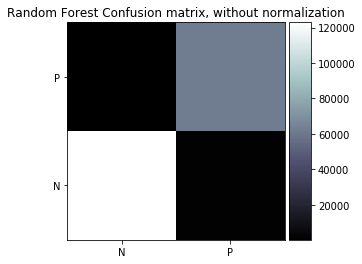

In [287]:
plot_confusion_matrix(rf.predict(higgsdata_train.values), labels_train,
                      title = 'Random Forest')

**Figure 1**: the confusion matrix for the Random Forest algorithm

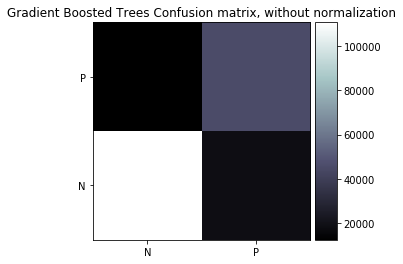

In [288]:
plot_confusion_matrix(gbt.predict(higgsdata_train.values), labels_train,
                      title = 'Gradient Boosted Trees')

**Figure 2**: The confusion matrix for the Gradient Boosted algorithm

## Weight Prediction

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [290]:
rfR = RandomForestRegressor(n_estimators = 100, max_depth = 3,
                            random_state = 100228)
rfR.fit(higgsdata_train.values, weights_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=100228,
                      verbose=0, warm_start=False)

In [291]:
gbtR = GradientBoostingRegressor(n_estimators = 100, max_depth = 3,
                                 random_state = 100513)
gbtR.fit(higgsdata_train.values, weights_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=100513, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [292]:
print('L1 for Random Forest Regressor: {:.4}'.format(np.sum(
    np.abs(weights_train - rfR.predict(higgsdata_train.values)))))
print('L1 for Gradient Boosting Regressor: {:.4}'.format(np.sum(
    np.abs(weights_train - gbtR.predict(higgsdata_train.values)))))
print('L2 for Random Forest Regressor: {:.4}'.format(np.sum(
    (weights_train - rfR.predict(higgsdata_train.values))**2)))
print('L2 for Gradient Boosting Regressor: {:.4}'.format(np.sum(
    (weights_train - gbtR.predict(higgsdata_train.values))**2)))

L1 for Random Forest Regressor: 1.887e+05
L1 for Gradient Boosting Regressor: 1.575e+05
L2 for Random Forest Regressor: 3.435e+05
L2 for Gradient Boosting Regressor: 2.527e+05


In [293]:
important_features = rf.feature_importances_
important_columns = np.argsort(important_features)
sorted_columns = important_columns[-4:]
print(important_features, '\n', important_columns, '\n', sorted_columns)

[0.02314848 0.16028829 0.09449998 0.07815674 0.03352408 0.0207438
 0.01376738 0.00891111 0.0458763  0.02969836 0.02654566 0.04715474
 0.04260899 0.02438068 0.05049217 0.02469113 0.02267964 0.03099759
 0.02547465 0.02245876 0.03860155 0.02282198 0.02483053 0.00564409
 0.01534074 0.01950026 0.0140154  0.00527113 0.00560875 0.00615178
 0.01611523] 
 [27 28 23 29  7  6 26 24 30 25  5 19 16 21  0 13 15 22 18 10  9 17  4 20
 12  8 11 14  3  2  1] 
 [14  3  2  1]


In [294]:
higgs_important_feature = higgsdata[higgsdata.columns[sorted_columns]]
higgs_important_train = higgsdata_train[higgsdata_train.columns[sorted_columns]]
higgs_important_test = higgsdata_test[higgsdata_test.columns[sorted_columns]]
higgs_important_feature

,PRI_tau_pt,DER_mass_vis,DER_mass_transverse_met_lep,DER_mass_MMC
0,32.638,97.827,51.655,138.470
1,42.014,103.235,68.768,160.937
2,32.154,125.953,162.172,-999.000
3,22.647,80.943,81.417,143.905
4,28.209,134.805,16.915,175.864
...,...,...,...,...
249995,24.754,36.548,71.989,-999.000
249996,23.416,68.083,58.179,-999.000
249997,35.636,75.839,60.526,105.457
249998,27.944,68.812,19.362,94.951


In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
random_grid = {'max_depth': [3, 10, None],
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [10,100,1000]}

In [0]:
random_search = RandomizedSearchCV(estimator = rf,
                                   param_distributions = random_grid, n_iter = 1,
                                   cv = 3, iid = False, random_state = 154139)

In [298]:
random_search.fit(higgs_important_train, labels_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [0]:
search_score = random_search.score(higgs_important_test,labels_test)

In [300]:
print("Tuned RF  Parameters: {}".format(random_search.get_params()))
print("Best score is {}".format(search_score))

Tuned RF  Parameters: {'cv': 3, 'error_score': 'raise-deprecating', 'estimator__bootstrap': True, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 10, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 94755, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_

In [301]:
random_search.cv_results_

{'mean_fit_time': array([1.07965136]),
 'mean_score_time': array([0.16336576]),
 'mean_test_score': array([0.79456]),
 'param_max_depth': masked_array(data=[3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 10}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.794096]),
 'split1_test_score': array([0.793472]),
 'split2_test_score': array([0.796112]),
 'std_fit_time': array([0.07625995]),
 'std_score_time': array([0.00054872]),
 'std_test_score': array([0.00112661])}

In [302]:
df = pd.DataFrame(random_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.079651,0.07626,0.163366,0.000549,10,auto,3,"{'n_estimators': 10, 'max_features': 'auto', '...",0.794096,0.793472,0.796112,0.79456,0.001127,1


## ROC Curve

In [0]:
rf2 = RandomForestClassifier(max_depth = None,
       max_features = 'auto', n_estimators = 10, random_state = 94755)

In [304]:
rf2.fit(higgsdata_train, labels_train.flatten()=="s")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=94755,
                       verbose=0, warm_start=False)

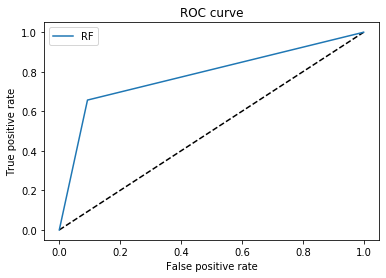

In [305]:
from sklearn.metrics import roc_curve
# y_pred_grd_rfcat = rf2.predict_proba(higgsdata_test)[:,1]

fpr_rf, tpr_rf, _ = roc_curve(labels_test.flatten()=="s",
                              rf2.predict(higgsdata_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


**Figure 3:** The Reciever Operating Characteristic curve for the Random Forest algorithm.

## 667: Kaggle Evaluation

In [306]:
higgsdata_test

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
133626,233626,-999.000,90.952,44.779,11.787,-999.000,-999.000,-999.000,1.334,11.787,68.649,0.873,-1.402,-999.000,36.647,-0.141,2.455,32.001,0.653,1.383,68.126,-1.301,186.808,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
130139,230139,113.265,84.472,70.433,115.208,1.274,277.954,-0.143,2.312,82.546,346.914,1.312,1.211,0.065,28.638,0.759,-1.330,37.564,-0.540,0.583,86.879,-1.081,472.180,3,117.931,1.150,1.601,112.824,-0.124,-1.899,280.713
122966,222966,80.944,7.304,52.515,76.038,1.554,133.742,2.989,1.758,43.023,203.078,1.307,1.185,0.001,28.624,-0.450,2.931,37.415,0.217,-1.725,32.235,-1.936,261.155,3,68.814,-2.672,0.609,36.710,-1.119,-2.719,137.039
159571,259571,159.804,11.674,99.568,96.388,3.843,310.161,-2.073,2.320,21.794,184.576,1.151,1.206,0.788,43.054,-0.974,-0.475,49.560,0.334,-2.391,47.643,-2.150,221.275,2,52.869,-0.649,1.891,39.094,3.194,0.647,91.963
214502,314502,94.103,2.298,53.741,70.090,-999.000,-999.000,-999.000,2.195,1.682,125.778,1.331,1.063,-999.000,23.418,1.695,-1.936,31.158,0.613,-0.026,42.288,-0.090,135.790,1,71.202,0.073,2.772,-999.000,-999.000,-999.000,71.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122270,222270,-999.000,107.987,76.891,25.549,-999.000,-999.000,-999.000,2.358,25.549,88.047,1.980,-1.402,-999.000,29.546,0.467,-1.425,58.501,0.422,0.932,60.620,-3.080,102.447,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
142958,242958,-999.000,70.038,56.808,226.561,1.617,222.181,-0.591,0.903,38.181,400.497,0.753,0.150,0.049,70.670,-0.314,-2.000,53.219,-1.154,-2.335,138.158,3.107,541.056,3,166.092,-0.559,0.339,70.995,1.058,1.294,276.607
82452,182452,238.587,53.528,183.963,52.739,-999.000,-999.000,-999.000,3.660,52.739,115.143,0.324,-1.413,-999.000,86.966,1.374,0.997,28.177,-1.104,-2.593,49.683,-0.998,309.580,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
183937,283937,103.500,32.699,83.670,1.100,-999.000,-999.000,-999.000,2.853,1.100,74.744,0.799,-1.405,-999.000,41.540,-0.810,-1.530,33.204,-1.905,1.104,19.397,2.504,106.939,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000


In [307]:
pd.read_csv("test.csv")

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,899995,309.530,28.185,170.795,99.349,-999.000,-999.000,-999.000,3.061,2.367,212.640,0.708,1.346,-999.000,67.429,0.657,-2.560,47.761,-1.372,1.431,61.754,1.956,177.103,1,97.451,-1.759,-0.733,-999.000,-999.000,-999.000,97.451
549996,899996,105.653,5.096,77.256,33.040,-999.000,-999.000,-999.000,2.693,33.040,62.279,0.948,0.551,-999.000,31.964,0.162,-2.624,30.315,-1.404,-0.432,12.670,-0.172,130.730,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549997,899997,-999.000,69.470,51.766,1.189,-999.000,-999.000,-999.000,1.615,1.189,72.350,0.752,-1.398,-999.000,41.290,0.559,-2.156,31.060,0.578,2.512,49.505,0.336,71.646,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549998,899998,107.254,13.500,79.833,50.801,-999.000,-999.000,-999.000,2.026,7.993,135.762,1.087,-0.288,-999.000,44.403,-0.504,1.710,48.260,-0.096,-0.274,7.741,-0.988,243.371,1,43.099,-0.352,-2.594,-999.000,-999.000,-999.000,43.099


In [0]:
solutions_bools = rf2.predict(higgsdata_test.values)

submission_signals = np.empty_like(solutions_bools, dtype=str)

for i in range(len(solutions_bools)):
    if solutions_bools[i]:
        submission_signals[i] = 's'
    else:
        submission_signals[i] = 'b'

In [325]:
submission_signals[:13]

array(['b', 'b', 'b', 's', 'b', 'b', 'b', 'b', 'b', 's', 'b', 'b', 's'],
      dtype='<U1')

In [326]:
labels_test[:13]

array(['b', 'b', 'b', 's', 'b', 'b', 's', 'b', 'b', 's', 'b', 'b', 's'],
      dtype=object)

In [327]:
weights_test

array([0.74405625, 0.74405625, 0.06406078, ..., 0.74405625, 0.01863612,
       1.68161144])

In [0]:
shea_submission = pd.DataFrame()

In [437]:
labels_test

array(['b', 'b', 'b', ..., 'b', 's', 'b'], dtype=object)

In [0]:
shea_submission['EventId'] = higgsdata_test['EventId']
shea_submission['Weight'] = gbtR.predict(higgsdata_test.values)
shea_submission['Label'] = submission_signals

In [0]:
shea_submission.to_csv('/content/drive/My Drive/dsps/HW9/\
kaggleHiggsBoson/mysubmission.csv')

In [0]:
shea_solution = pd.DataFrame()

In [0]:
shea_solution['EventId'] = higgsdata_test['EventId']
shea_solution['Label'] = labels_test
shea_solution['Weight'] = weights_test

In [0]:
shea_solution.to_csv('/content/drive/My Drive/dsps/HW9/\
kaggleHiggsBoson/mysolution.csv')

In [443]:
print(shea_solution.describe())
print(shea_submission.describe())

             EventId        Weight
count   62500.000000  62500.000000
mean   225134.262160      1.634803
std     72158.241963      1.864469
min    100007.000000      0.001502
25%    162525.250000      0.018636
50%    225506.500000      1.131588
75%    287592.750000      2.384784
max    349992.000000      7.769833
             EventId        Weight
count   62500.000000  62500.000000
mean   225134.262160      1.643465
std     72158.241963      1.442765
min    100007.000000     -0.596309
25%    162525.250000      0.448605
50%    225506.500000      1.171488
75%    287592.750000      2.635254
max    349992.000000      6.651658


In [440]:
!python2 HiggsBosonCompetition_AMSMetric_rev1.py

signal = 0.0, background = 0.0
AMS = 0.0


# The format is "specified" on kaggle, yet the validation script wants a different format. We need something called a "rank order" which is not described anywhere, and we are just told to "calculate". Futhermore, we need a solution dataset that is ***also*** formatted in some unspecified way, and the validation script is very vague here as well. I quit.